## **BUSINESS UNDERSTANDING**

**Problem Statement:**

Company ABC, a major credit card company, faces challenges with their existing fraud detection system. The current system exhibits slow responsiveness in recognizing new patterns of fraud, leading to significant financial losses. To address this issue, they have contracted us to design and implement an algorithm that can efficiently identify and flag potentially fraudulent transactions for further investigation. The data provided consists of two tables: "cc_info," containing general credit card and cardholder information, and "transactions," containing details of credit card transactions that occurred between August 1st and October 30th.

**Objective:**

The primary goal of this project is to build an advanced fraud detection system using neural networks to identify transactions that appear unusual and potentially fraudulent. By applying object-oriented programming (OOPs) concepts, we aim to develop a scalable and modular solution that can handle large volumes of data and provide valuable insights to Company ABC.


**Data Dictionary for cc_info.csv**

| Column Name        | Data Type | Description                                       |
|--------------------|-----------|---------------------------------------------------|
| credit_card        | float     | Credit card number (masked for privacy)          |
| city               | object    | City where the credit card is registered         |
| state              | object    | State where the credit card is registered        |
| zipcode            | int       | Zip code of the credit card's billing address     |
| credit_card_limit  | int       | Credit card limit (maximum allowable amount)     |


**Data Dictionary for transactions.csv**


| Column Name                | Data Type | Description                                              |
|---------------------------|-----------|----------------------------------------------------------|
| credit_card                | float     | Credit card number (masked for privacy)                 |
| date                       | object    | Date and time of the transaction                        |
| transaction_dollar_amount  | float     | Dollar amount of the transaction                        |
| Long                       | float     | Longitude of the location where the transaction was made|
| Lat                        | float     | Latitude of the location where the transaction was made |


Data was sourced from Kaggle : https://www.kaggle.com/datasets/iabhishekofficial/creditcard-fraud-detection


In [2]:
import sklearn
print(sklearn.__version__)


1.2.2


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# !pip install -q <lib_001> <lib_002> ...
!pip install imbalanced-learn

!pip install kaggle


In [5]:
# Data handling
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import skew, kurtosis

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import scatter_matrix

# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Imbalanced data handling
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Model evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, \
    precision_score, recall_score, fbeta_score, make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Anomaly detection models
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

import hashlib
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [6]:
import os

# Set the environment variables with your Kaggle credentials
os.environ['KAGGLE_USERNAME'] = "aliduabubakari"
os.environ['KAGGLE_KEY'] = "e0955cb855d1405ece24ae80c7914d57"


In [7]:
import os

# Replace the folder path with your desired target folder
target_folder = "/content/drive/MyDrive/Colab Notebooks/Anomaly Detection"
os.makedirs(target_folder, exist_ok=True)


In [8]:
# Replace 'creditcard-fraud-detection' with the actual dataset name
!kaggle datasets download -d iabhishekofficial/creditcard-fraud-detection -p "{target_folder}"


creditcard-fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
import zipfile
import os

# List the downloaded files in the target folder
downloaded_files = os.listdir(target_folder)

# Find the name of the downloaded zip file
zip_file_name = [file for file in downloaded_files if file.endswith('.zip')][0]

# Unzip the downloaded zip file in the target folder
with zipfile.ZipFile(os.path.join(target_folder, zip_file_name), "r") as zip_ref:
    zip_ref.extractall(target_folder)


In [10]:
import os

# List the files in the target folder to verify the extracted files
os.listdir(target_folder)

['creditcard-fraud-detection.zip',
 'credit-card-fraud-detection.ipynb',
 'kaggle.json',
 'content',
 'CreditCardAnomalyDectection-EDA.ipynb',
 'CreditCardAnomalyDectection-ML.ipynb',
 'CreditCardAnomalyDectection_ML_FE (1).ipynb',
 'CreditCardAnomalyDectection-ML-LSTM.ipynb',
 'cc_info.csv',
 'transactions.csv',
 'CreditCardAnomalyDectection-ML-Anomaly.ipynb']

In [11]:
# Construct the full file paths
cc_info_path = os.path.join(target_folder, "cc_info.csv")
transactions_path = os.path.join(target_folder, "transactions.csv")

# Read the CSV files
df_cc_info = pd.read_csv(cc_info_path)
df_transactions = pd.read_csv(transactions_path)


In [12]:
df_cc_info.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [13]:
df_cc_info['credit_card'].head()

0    1280981422329509
1    9737219864179988
2    4749889059323202
3    9591503562024072
4    2095640259001271
Name: credit_card, dtype: int64

In [14]:
#check shape of data
df_cc_info.shape

(984, 5)

In [15]:
df_cc_info.columns.tolist()

['credit_card', 'city', 'state', 'zipcode', 'credit_card_limit']

In [16]:
df_cc_info.dtypes

credit_card           int64
city                 object
state                object
zipcode               int64
credit_card_limit     int64
dtype: object

In [17]:
# Check for missing values in the credit card info DataFrame
df_cc_info.isna().sum()

credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64

In [18]:
#check for duplicates (credit card info)
df_cc_info.duplicated().sum()

0

In [19]:
df_transactions.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [20]:
# Convert the 'date' column to datetime data type
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

In [21]:
df_transactions['date'].head()

0   2015-09-11 00:32:40
1   2015-10-24 22:23:08
2   2015-10-26 18:19:36
3   2015-10-22 19:41:10
4   2015-10-26 20:08:22
Name: date, dtype: datetime64[ns]

In [22]:
#check shape of data
df_transactions.shape

(294588, 5)

In [23]:
df_transactions.columns

Index(['credit_card', 'date', 'transaction_dollar_amount', 'Long', 'Lat'], dtype='object')

In [24]:
df_transactions.dtypes

credit_card                           int64
date                         datetime64[ns]
transaction_dollar_amount           float64
Long                                float64
Lat                                 float64
dtype: object

In [25]:
# Check for missing values in the credit card info DataFrame
df_transactions.isna().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64

In [26]:
#check for duplicates (credit card info)
df_transactions.duplicated().sum()

0

## Merge the datasets

In [27]:
# Perform a left join on the 'credit_card' column
#merged_df = pd.merge(df_transactions, df_cc_info, on='credit_card', how='left')

# Perform a left join on the 'credit_card' column
merged_df = pd.merge(df_transactions, df_cc_info, on='credit_card')


# Display the first few rows of the merged DataFrame to verify the result
merged_df.head()


,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000


In [28]:
# Check for missing values in the credit card info DataFrame
merged_df.isna().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
city                         0
state                        0
zipcode                      0
credit_card_limit            0
dtype: int64

In [29]:
#check shape of data
merged_df.shape

(294588, 9)

In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294588 entries, 0 to 294587
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   date                       294588 non-null  datetime64[ns]
 2   transaction_dollar_amount  294588 non-null  float64       
 3   Long                       294588 non-null  float64       
 4   Lat                        294588 non-null  float64       
 5   city                       294588 non-null  object        
 6   state                      294588 non-null  object        
 7   zipcode                    294588 non-null  int64         
 8   credit_card_limit          294588 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 22.5+ MB


In [31]:
merged_df.duplicated().sum()

0

In [32]:
def hash_credit_card(credit_card_number, hash_length=8):
    # Convert the credit card number to bytes (hashlib works with bytes)
    credit_card_bytes = str(credit_card_number).encode('utf-8')

    # Create a SHA-256 hash object
    hash_object = hashlib.sha256(credit_card_bytes)

    # Get the hexadecimal representation of the hash and truncate to the desired length
    hashed_credit_card = hash_object.hexdigest()[:hash_length]

    return hashed_credit_card

In [33]:
# Apply the hash_credit_card function to the 'credit_card' column
merged_df['hashed_credit_card'] = merged_df['credit_card'].apply(hash_credit_card)

# drop the date column from the data set
merged_df.drop(columns="credit_card", inplace=True)

In [34]:
# Display the updated DataFrame with the hashed credit card numbers
merged_df.head()

,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,hashed_credit_card
0,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000,02e58935
1,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000,02e58935
2,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000,02e58935
3,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000,02e58935
4,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000,02e58935


In [35]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_dollar_amount,294588.0,86.008036,124.655954,0.010000,29.970000,58.470000,100.400000,999.970000
Long,294588.0,-76.235238,20.135015,-179.392887,-80.209708,-73.199737,-72.091933,179.917513
Lat,294588.0,40.937669,5.391695,-68.046553,40.487726,42.403066,43.180015,78.914330
zipcode,294588.0,18073.772516,23945.510551,690.000000,3280.000000,5820.000000,18612.000000,98401.000000
credit_card_limit,294588.0,15502.053716,7956.291556,2000.000000,10000.000000,15000.000000,20000.000000,55000.000000


### **TIME SERIES DATA**

In [36]:
# Extract the year, month, and day from the 'date' column
merged_df['year'] = merged_df['date'].dt.year
merged_df['month'] = merged_df['date'].dt.month
merged_df['day'] = merged_df['date'].dt.day


# Display the updated DataFrame with the new date components
merged_df.head()


,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,hashed_credit_card,year,month,day
0,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000,02e58935,2015,9,11
1,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000,02e58935,2015,10,24
2,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000,02e58935,2015,10,26
3,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000,02e58935,2015,10,22
4,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000,02e58935,2015,10,26


In [37]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294588 entries, 0 to 294587
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       294588 non-null  datetime64[ns]
 1   transaction_dollar_amount  294588 non-null  float64       
 2   Long                       294588 non-null  float64       
 3   Lat                        294588 non-null  float64       
 4   city                       294588 non-null  object        
 5   state                      294588 non-null  object        
 6   zipcode                    294588 non-null  int64         
 7   credit_card_limit          294588 non-null  int64         
 8   hashed_credit_card         294588 non-null  object        
 9   year                       294588 non-null  int64         
 10  month                      294588 non-null  int64         
 11  day                        294588 non-null  int64   

### **Data Preprocessing**

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Calculate the total number of days within the date range
total_days = (merged_df['date'].max() - merged_df['date'].min()).days + 1

# Calculate the number of rows that should be selected per day
rows_per_day = int(len(merged_df) * 0.1 / total_days)

# Create an empty DataFrame to store the selected rows
selected_rows = pd.DataFrame(columns=merged_df.columns)

# Iterate through each day and select rows
for day in pd.date_range(start=merged_df['date'].min(), end=merged_df['date'].max(), freq='D'):
    day_data = merged_df[merged_df['date'].dt.date == day.date()].sample(rows_per_day, random_state=42)
    selected_rows = pd.concat([selected_rows, day_data], ignore_index=True)

# Reset the index of the selected DataFrame
selected_rows.reset_index(drop=True, inplace=True)

# Define the date range for train-test split
start_date = pd.Timestamp('2015-07-31 09:39:48')
end_date = pd.Timestamp('2015-10-30 10:54:58')

# Filter the data based on the date range
selected_data = selected_rows.loc[(selected_rows['date'] >= start_date) & (selected_rows['date'] <= end_date)]



In [39]:
print(merged_df.shape)

(294588, 12)


In [40]:
print(selected_rows.shape)

(29440, 12)


In [41]:
selected_rows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29440 entries, 0 to 29439
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       29440 non-null  datetime64[ns]
 1   transaction_dollar_amount  29440 non-null  float64       
 2   Long                       29440 non-null  float64       
 3   Lat                        29440 non-null  float64       
 4   city                       29440 non-null  object        
 5   state                      29440 non-null  object        
 6   zipcode                    29440 non-null  object        
 7   credit_card_limit          29440 non-null  object        
 8   hashed_credit_card         29440 non-null  object        
 9   year                       29440 non-null  object        
 10  month                      29440 non-null  object        
 11  day                        29440 non-null  object        
dtypes: d

### **Spatial Analysis for Anomaly Detection**

In [42]:
selected_rows.columns

Index(['date', 'transaction_dollar_amount', 'Long', 'Lat', 'city', 'state',
       'zipcode', 'credit_card_limit', 'hashed_credit_card', 'year', 'month',
       'day'],
      dtype='object')

In [43]:
import geopandas as gpd
from shapely.geometry import Point

df_spatial = selected_rows.copy()

# Convert 'date' column to datetime format
df_spatial['date'] = pd.to_datetime(df_spatial['date'])

# Set the 'date' column as the index
df_spatial.set_index('date', inplace=True)

# Extract "Long" and "Lat" feature columns from the DataFrame
df = df_spatial[['Long', 'Lat']]


<Axes: >

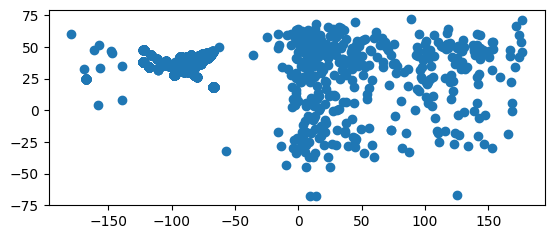

In [44]:
# Create a GeoDataFrame with the mean values
geometry = [Point(xy) for xy in zip(df.Long, df.Lat)]
gdf_mean = gpd.GeoDataFrame(df, geometry=geometry)

# Plot the GeoDataFrame with mean values
gdf_mean.plot()

In [45]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# Assuming gdf_mean is your GeoDataFrame

# Extract coordinates
gdf_mean['longitude'] = gdf_mean.geometry.x
gdf_mean['latitude'] = gdf_mean.geometry.y

# Create a DBSCAN object
dbscan = DBSCAN()

# Fit DBSCAN on the entire dataset
gdf_mean['cluster'] = dbscan.fit_predict(gdf_mean[['longitude', 'latitude']])

# Define a function to classify points as anomaly or not
def classify_anomaly(cluster_label):
    if cluster_label == -1:
        return 'Anomaly'
    else:
        return 'Not Anomaly'

# Apply the classification function to each row
gdf_mean['classification'] = gdf_mean['cluster'].apply(classify_anomaly)


In [46]:
# Calculate the percentage of anomalies and non-anomalies
num_anomalies = (gdf_mean['classification'] == 'Anomaly').sum()
num_non_anomalies = (gdf_mean['classification'] == 'Not Anomaly').sum()
total_points = len(gdf_mean)

percentage_anomalies = (num_anomalies / total_points) * 100
percentage_non_anomalies = (num_non_anomalies / total_points) * 100

print("Percentage of Anomalies:", percentage_anomalies)
print("Percentage of Non-Anomalies:", percentage_non_anomalies)



Percentage of Anomalies: 1.4673913043478262
Percentage of Non-Anomalies: 98.53260869565217


In [47]:
# Display a sample of anomaly records
anomaly_records = gdf_mean[gdf_mean['classification'] == 'Anomaly'].head(5)
print("Anomaly Records:")
print(anomaly_records[['longitude', 'latitude', 'classification']])

# Display a sample of non-anomaly records
non_anomaly_records = gdf_mean[gdf_mean['classification'] == 'Not Anomaly'].head(5)
print("Non-Anomaly Records:")
print(non_anomaly_records[['longitude', 'latitude', 'classification']])


Anomaly Records:
                      longitude   latitude classification
date                                                     
2015-07-31 21:43:22   31.979577  65.495140        Anomaly
2015-07-31 21:13:37   12.631539  -6.101343        Anomaly
2015-07-31 16:50:09  125.721185  50.744899        Anomaly
2015-08-01 19:03:28   45.362062  51.364858        Anomaly
2015-08-01 21:48:44    2.423649  36.929573        Anomaly
Non-Anomaly Records:
                     longitude   latitude classification
date                                                    
2015-07-31 23:29:53 -77.505572  42.572038    Not Anomaly
2015-07-31 20:12:31 -72.064172  43.102927    Not Anomaly
2015-07-31 23:37:37 -72.076318  43.238575    Not Anomaly
2015-07-31 22:54:27 -71.474067  42.456970    Not Anomaly
2015-07-31 23:48:05 -72.290237  44.572580    Not Anomaly


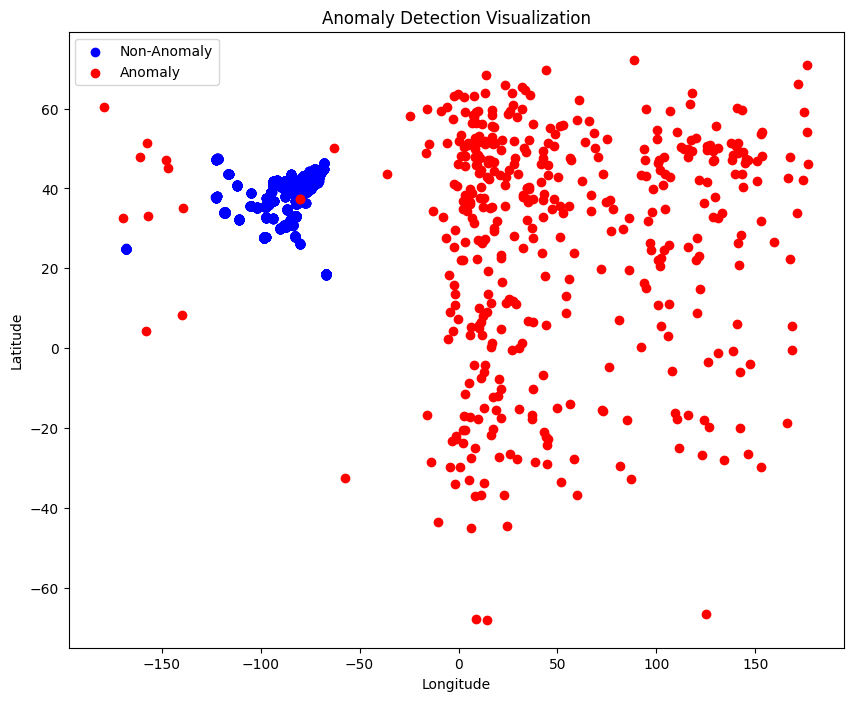

In [48]:
import matplotlib.pyplot as plt

# Plot anomalies in red and non-anomalies in blue
plt.figure(figsize=(10, 8))

# Plot non-anomalies (only a few for visualization)
non_anomaly_sample = gdf_mean[gdf_mean['classification'] == 'Not Anomaly']
plt.scatter(non_anomaly_sample['longitude'], non_anomaly_sample['latitude'], color='blue', label='Non-Anomaly')

# Plot anomalies
anomaly_records = gdf_mean[gdf_mean['classification'] == 'Anomaly']
plt.scatter(anomaly_records['longitude'], anomaly_records['latitude'], color='red', label='Anomaly')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Anomaly Detection Visualization')
plt.legend()
plt.show()


In [49]:
import numpy as np
from sklearn.metrics import auc

# Calculate precision-recall based on the DBSCAN clusters
precision = []
recall = []

# Calculate true positives, false positives, and total anomalies
num_anomalies = (gdf_mean['classification'] == 'Anomaly').sum()
true_positives = 0
false_positives = 0

for index, row in gdf_mean.iterrows():
    if row['classification'] == 'Anomaly':
        true_positives += 1
    else:
        false_positives += 1

    # Calculate precision and recall
    precision.append(true_positives / (true_positives + false_positives))
    recall.append(true_positives / num_anomalies)

# Calculate AUC-PR using the trapezoidal rule
auc_pr = auc(recall, precision)

print("Estimated AUC-PR using DBSCAN:", auc_pr)


Estimated AUC-PR using DBSCAN: 0.014863333820823728


### **ISOLATION FOREST**

In [50]:
df= selected_rows.copy()

# Select relevant columns for anomaly detection
selected_columns = selected_rows[['transaction_dollar_amount', 'Long', 'Lat', 'credit_card_limit', 'year', 'month', 'day']]

# Standardize the selected columns
scaler = StandardScaler()
selected_columns_scaled = scaler.fit_transform(selected_columns)

In [51]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Apply Isolation Forest for anomaly detection
isolation_forest = IsolationForest(contamination=0.1)  # Adjust contamination as needed
df['iso_anomaly_score'] = isolation_forest.fit_predict(selected_columns_scaled)

# Classify anomalies based on anomaly scores
df['isolation_class'] = np.where(df['iso_anomaly_score'] == -1, 'Anomaly', 'Not Anomaly')



In [52]:
# Calculate the number of anomalies and non-anomalies
num_anomalies = (df['isolation_class']== 'Anomaly').sum()
num_non_anomalies = (df['isolation_class'] == 'Not Anomaly').sum()

total_records = len(df)

# Calculate the percentage of anomalies and non-anomalies
percentage_anomalies = (num_anomalies / total_records) * 100
percentage_non_anomalies = (num_non_anomalies / total_records) * 100

print("Number of Anomalies:", num_anomalies)
print("Number of Non-Anomalies:", num_non_anomalies)
print("Percentage of Anomalies:", percentage_anomalies)
print("Percentage of Non-Anomalies:", percentage_non_anomalies)

Number of Anomalies: 2944
Number of Non-Anomalies: 26496
Percentage of Anomalies: 10.0
Percentage of Non-Anomalies: 90.0


In [53]:
# Filter out non-anomaly data
selected_columns = ['transaction_dollar_amount', 'Long', 'Lat', 'credit_card_limit', 'year', 'month', 'day']
non_anomaly_df = df[df['isolation_class'] == 'Not Anomaly'][selected_columns]

# Save the non-anomaly data to a CSV file
non_anomaly_csv_filename = 'non_anomaly_data.csv'
non_anomaly_df.to_csv(non_anomaly_csv_filename, index=False)

print(f"Non-anomaly data saved to {non_anomaly_csv_filename}")


Non-anomaly data saved to non_anomaly_data.csv


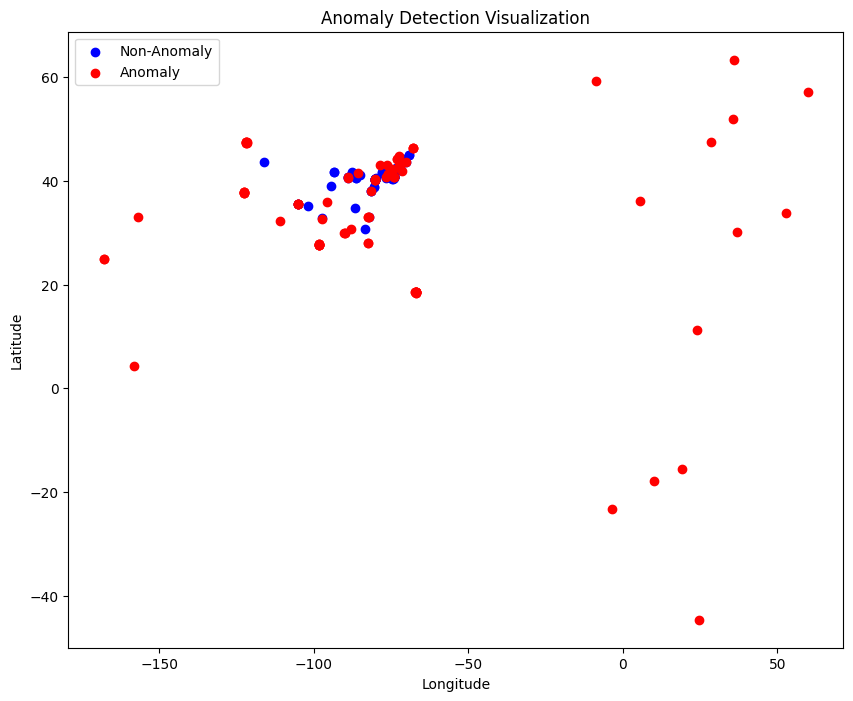

In [ ]:
# Plot anomalies in red and non-anomalies in blue
plt.figure(figsize=(10, 8))

# Plot non-anomalies (only a few for visualization)
non_anomaly_sample = df[df['isolation_class'] == 'Not Anomaly'].sample(100)

plt.scatter(non_anomaly_sample['Long'], non_anomaly_sample['Lat'], color='blue', label='Non-Anomaly')

# Plot anomalies
anomaly_records = df[df['isolation_class'] == 'Anomaly'].sample(100)
plt.scatter(anomaly_records['Long'], anomaly_records['Lat'], color='red', label='Anomaly')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Anomaly Detection Visualization')
plt.legend()
plt.show()

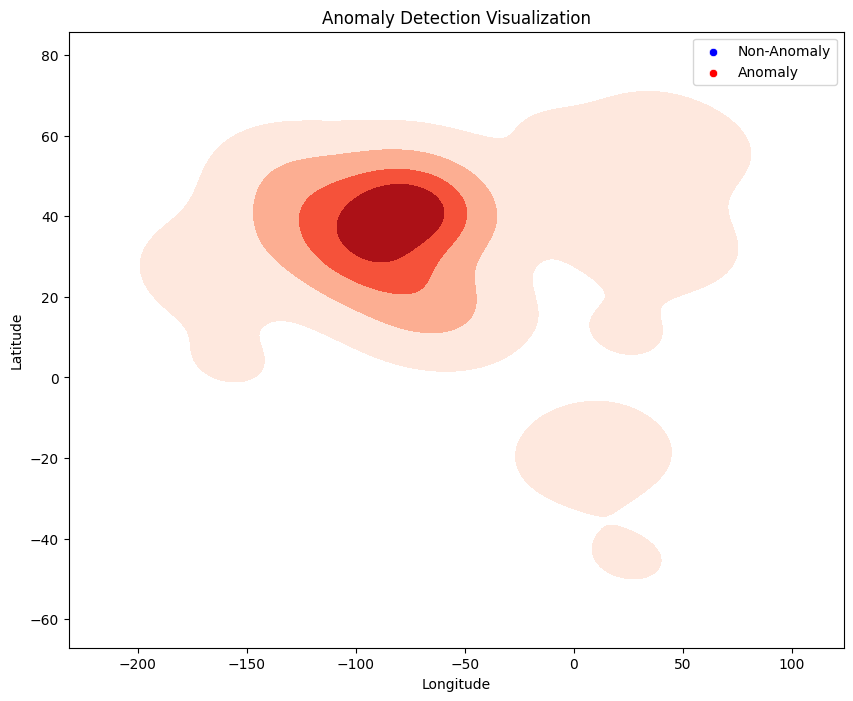

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Scatter plot for non-anomalies with KDE contours
sns.scatterplot(data=non_anomaly_records, x='Long', y='Lat', color='blue', label='Non-Anomaly')
sns.kdeplot(data=non_anomaly_records, x='Long', y='Lat', cmap='Blues', fill=True, levels=5, thresh=0.05)

# Scatter plot for anomalies with KDE contours
sns.scatterplot(data=anomaly_records, x='Long', y='Lat', color='red', label='Anomaly')
sns.kdeplot(data=anomaly_records, x='Long', y='Lat', cmap='Reds', fill=True, levels=5, thresh=0.05)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Anomaly Detection Visualization')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Replace this with the actual anomaly scores you have
anomaly_scores = df['iso_anomaly_score']

# Convert 'isolation_class' to binary labels (1 for 'Anomaly', 0 for 'Not Anomaly')
binary_labels = df['isolation_class'].apply(lambda x: 1 if x == 'Anomaly' else 0)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(binary_labels, anomaly_scores)

# Calculate AUC-PR
auc_pr = auc(recall, precision)

print("AUC-PR for Isolation Forest:", auc_pr)


AUC-PR for Isolation Forest: 0.05


### **DBScan Clustering**

In [ ]:
from sklearn.cluster import DBSCAN

df_2= selected_rows.copy()

# Apply DBSCAN for anomaly detection
dbscan = DBSCAN(eps=0.5, min_samples=10)
df_2['dbscan_cluster'] = dbscan.fit_predict(selected_columns_scaled)

# Define a function to classify points as anomaly or not
def classify_anomaly(cluster_label):
    if cluster_label == -1:
        return 'Anomaly'
    else:
        return 'Not Anomaly'

# Apply the classification function to each row
df_2['dbscan_classification'] = df_2['dbscan_cluster'].apply(classify_anomaly)

# Print the number of anomalies and non-anomalies
num_anomalies = (df_2['dbscan_classification'] == 'Anomaly').sum()
num_non_anomalies = (df_2['dbscan_classification'] == 'Not Anomaly').sum()

print("Number of Anomalies:", num_anomalies)
print("Number of Non-Anomalies:", num_non_anomalies)

total_points = len(df)

# Calculate the percentage of anomalies and non-anomalies
percentage_anomalies = (num_anomalies / total_points) * 100
percentage_non_anomalies = (num_non_anomalies / total_points) * 100

print("Percentage of Anomalies:", percentage_anomalies)
print("Percentage of Non-Anomalies:", percentage_non_anomalies)


Number of Anomalies: 3896
Number of Non-Anomalies: 25544
Percentage of Anomalies: 13.233695652173912
Percentage of Non-Anomalies: 86.76630434782608


In [ ]:
# Print a few anomaly records
print("Anomaly Records:")
anomaly_records = df_2[df_2['dbscan_classification']  == 'Anomaly'].head(5)
print(anomaly_records)

Anomaly Records:
                  date  transaction_dollar_amount        Long        Lat  \
0  2015-07-31 23:29:53                       0.58  -77.505572  42.572038   
1  2015-07-31 20:12:31                     123.94  -72.064172  43.102927   
5  2015-07-31 20:19:58                     962.63 -116.234592  43.622795   
8  2015-07-31 16:59:43                      86.87  -81.495106  38.205882   
10 2015-07-31 23:18:51                     108.53  -82.511843  27.992284   

          city state zipcode credit_card_limit hashed_credit_card  year month  \
0      Atlanta    NY   14808             30000           efa85435  2015     7   
1   Washington    NH    3280             35000           0501ff3b  2015     7   
5        Boise    ID   83701             16000           6f06d0b2  2015     7   
8        Miami    WV   25134             27000           b1349afc  2015     7   
10       Tampa    FL   33601             20000           a8273112  2015     7   

   day  dbscan_cluster dbscan_classific

In [ ]:
# Print a few non-anomaly records
print("\nNon-Anomaly Records:")
non_anomaly_records = df_2[df_2['dbscan_classification']  == 'Not Anomaly'].head(5)
print(non_anomaly_records)


Non-Anomaly Records:
                 date  transaction_dollar_amount       Long        Lat  \
2 2015-07-31 23:37:37                      41.63 -72.076318  43.238575   
3 2015-07-31 22:54:27                      65.19 -71.474067  42.456970   
4 2015-07-31 23:48:05                      51.96 -72.290237  44.572580   
6 2015-07-31 19:30:10                      79.65 -75.937402  41.282181   
7 2015-07-31 20:44:53                     118.15 -80.192415  40.158487   

         city state zipcode credit_card_limit hashed_credit_card  year month  \
2  Washington    NH    3280             15000           f8e905e7  2015     7   
3   Lexington    MA    2173             10000           a12da2e3  2015     7   
4  Greensboro    VT    5841             16000           8776d092  2015     7   
6      Dallas    PA   18612             15000           b2342873  2015     7   
7     Houston    PA   15342             12000           097b4d62  2015     7   

  day  dbscan_cluster dbscan_classification  
2  31 

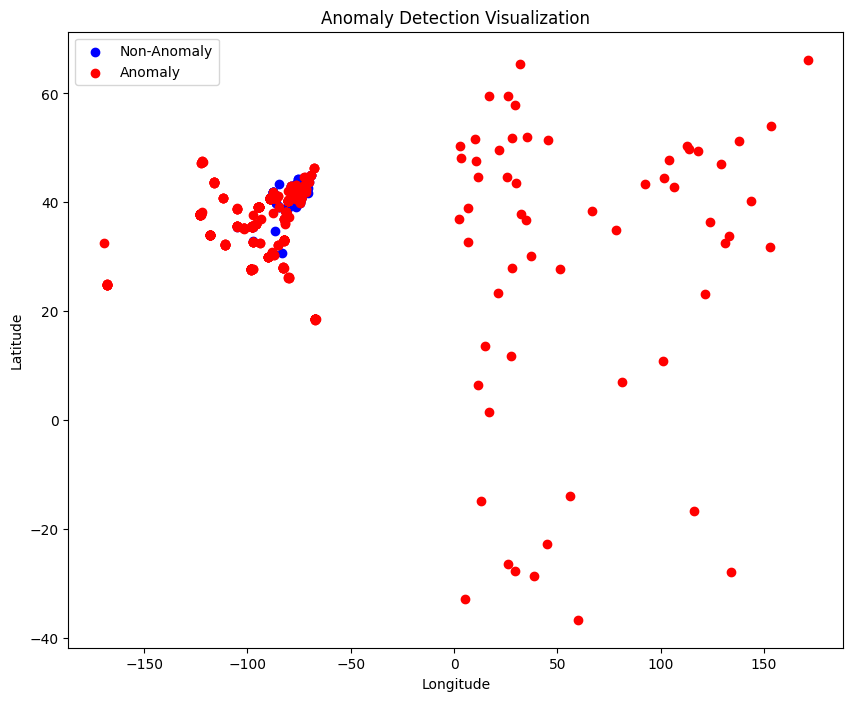

In [ ]:
# Plot anomalies in red and non-anomalies in blue
plt.figure(figsize=(10, 8))

# Plot non-anomalies (only a few for visualization)
non_anomaly_sample = df_2[df_2['dbscan_classification']  == 'Not Anomaly'].sample(200)
plt.scatter(non_anomaly_sample['Long'], non_anomaly_sample['Lat'], color='blue', label='Non-Anomaly')

# Plot anomalies
anomaly_records = df_2[df_2['dbscan_classification']  == 'Anomaly'].sample(500)
plt.scatter(anomaly_records['Long'], anomaly_records['Lat'], color='red', label='Anomaly')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Anomaly Detection Visualization')
plt.legend()
plt.show()


In [ ]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(
    df_2['dbscan_classification'].apply(lambda x: 1 if x == 'Anomaly' else 0),
    df_2['dbscan_cluster']
)

# Calculate AUC-PR
auc_pr = auc(recall, precision)

print("AUC-PR for DBSCAN:", auc_pr)



AUC-PR for DBSCAN: 0.06616847826086956


### **Local Outlier Factor Anomaly Detection**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define a custom scoring function
def negative_lof_score(estimator, X, y=None):
    return -estimator._decision_function(X).mean()

# Define the parameter grid
param_grid = {
    'n_neighbors': [5, 10, 20, 30],
    'contamination': [0.05, 0.1, 0.15, 0.2]
}

# Create a grid search with the custom scoring function
grid_search = GridSearchCV(LocalOutlierFactor(), param_grid, cv=5, scoring=make_scorer(negative_lof_score))

# Fit the grid search to the data
grid_search.fit(selected_columns_scaled)

# Get the best parameter values
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_contamination = grid_search.best_params_['contamination']

print("Best n_neighbors:", best_n_neighbors)
print("Best contamination:", best_contamination)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

df_3= selected_rows.copy()

# Apply Local Outlier Factor for anomaly detection
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed
df_3['lof_score'] = lof.fit_predict(selected_columns_scaled)

# Classify anomalies based on LOF scores
df_3['lof_class'] = np.where(df_3['lof_score'] == -1, 'Anomaly', 'Not Anomaly')

# Calculate the number of anomalies and non-anomalies
num_anomalies = (df_3['lof_class'] == 'Anomaly').sum()
num_non_anomalies = (df_3['lof_class'] == 'Not Anomaly').sum()

print("Number of Anomalies:", num_anomalies)
print("Number of Non-Anomalies:", num_non_anomalies)




Number of Anomalies: 2944
Number of Non-Anomalies: 26496


In [ ]:
total_records = len(df_3)

# Calculate the percentage of anomalies and non-anomalies
percentage_anomalies = (num_anomalies / total_records) * 100
percentage_non_anomalies = (num_non_anomalies / total_records) * 100


print("Percentage of Anomalies:", percentage_anomalies)
print("Percentage of Non-Anomalies:", percentage_non_anomalies)


Percentage of Anomalies: 10.0
Percentage of Non-Anomalies: 90.0


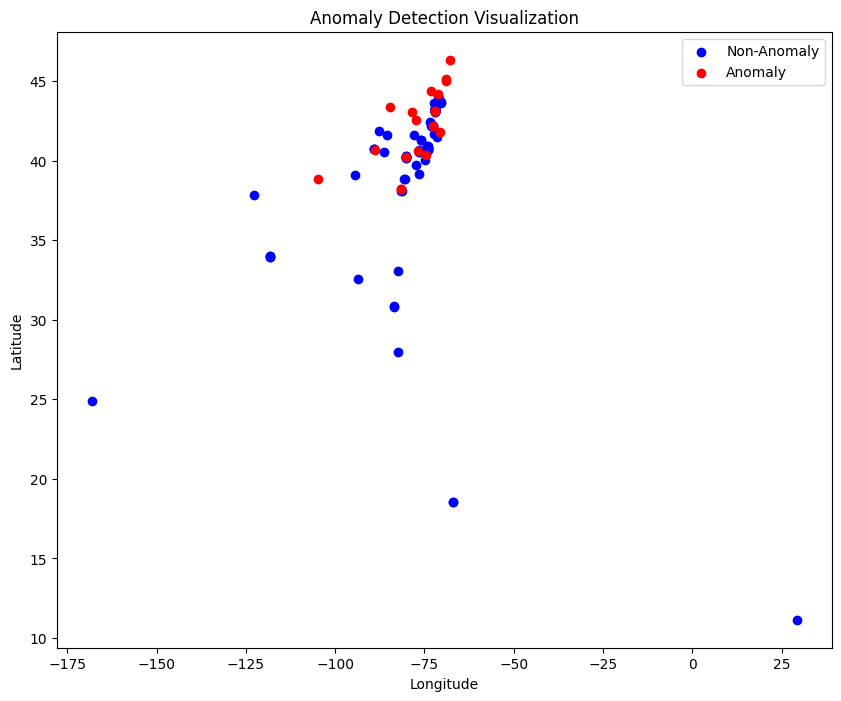

In [ ]:
# Plot anomalies in red and non-anomalies in blue
plt.figure(figsize=(10, 8))

# Plot non-anomalies (only a few for visualization)
non_anomaly_sample = df_3[df_3['lof_class'] == 'Not Anomaly'].sample(100)
plt.scatter(non_anomaly_sample['Long'], non_anomaly_sample['Lat'], color='blue', label='Non-Anomaly')

# Plot anomalies
anomaly_records = df_3[df_3['lof_class']== 'Anomaly'].sample(20)
plt.scatter(anomaly_records['Long'], anomaly_records['Lat'], color='red', label='Anomaly')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Anomaly Detection Visualization')
plt.legend()
plt.show()


In [ ]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(
    df_3['lof_class'].apply(lambda x: 1 if x == 'Anomaly' else 0),
    df_3['lof_score']
)

# Calculate AUC-PR
auc_pr = auc(recall, precision)

print("AUC-PR for Local Outlier Factor:", auc_pr)

AUC-PR for Local Outlier Factor: 0.05


### One-Class SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

df_4= selected_rows.copy()

# Apply One-Class SVM for anomaly detection
one_class_svm = OneClassSVM(nu=0.1)  # Adjust nu as needed
df_4['svm_prediction'] = one_class_svm.fit_predict(selected_columns_scaled)

# Classify anomalies based on SVM predictions
df_4['svm_classification'] = np.where(df_4['svm_prediction'] == -1, 'Anomaly', 'Not Anomaly')

# Calculate the number of anomalies and non-anomalies
num_anomalies = (df_4['svm_classification'] == 'Anomaly').sum()
num_non_anomalies = (df_4['svm_classification']== 'Not Anomaly').sum()


Number of Anomalies: 2947
Number of Non-Anomalies: 26493
Percentage of Anomalies: 10.010190217391305
Percentage of Non-Anomalies: 89.9898097826087


In [ ]:
total_records = len(df_4)

# Calculate the percentage of anomalies and non-anomalies
percentage_anomalies = (num_anomalies / total_records) * 100
percentage_non_anomalies = (num_non_anomalies / total_records) * 100

print("Number of Anomalies:", num_anomalies)
print("Number of Non-Anomalies:", num_non_anomalies)
print("Percentage of Anomalies:", percentage_anomalies)
print("Percentage of Non-Anomalies:", percentage_non_anomalies)

In [ ]:
# Print a few anomaly records
print("\nAnomaly Records:")
anomaly_records = df_4[df_4['svm_classification']== 'Anomaly'].head(5)
print(anomaly_records)

# Print a few non-anomaly records
print("\nNon-Anomaly Records:")
non_anomaly_records = df_4[df_4['svm_classification'] == 'Not Anomaly'].head(5)
print(non_anomaly_records)




Anomaly Records:
                 date  transaction_dollar_amount        Long        Lat  \
0 2015-07-31 23:29:53                       0.58  -77.505572  42.572038   
1 2015-07-31 20:12:31                     123.94  -72.064172  43.102927   
4 2015-07-31 23:48:05                      51.96  -72.290237  44.572580   
5 2015-07-31 20:19:58                     962.63 -116.234592  43.622795   
8 2015-07-31 16:59:43                      86.87  -81.495106  38.205882   

         city state zipcode credit_card_limit hashed_credit_card  year month  \
0     Atlanta    NY   14808             30000           efa85435  2015     7   
1  Washington    NH    3280             35000           0501ff3b  2015     7   
4  Greensboro    VT    5841             16000           8776d092  2015     7   
5       Boise    ID   83701             16000           6f06d0b2  2015     7   
8       Miami    WV   25134             27000           b1349afc  2015     7   

  day  svm_prediction svm_classification  
0  31  

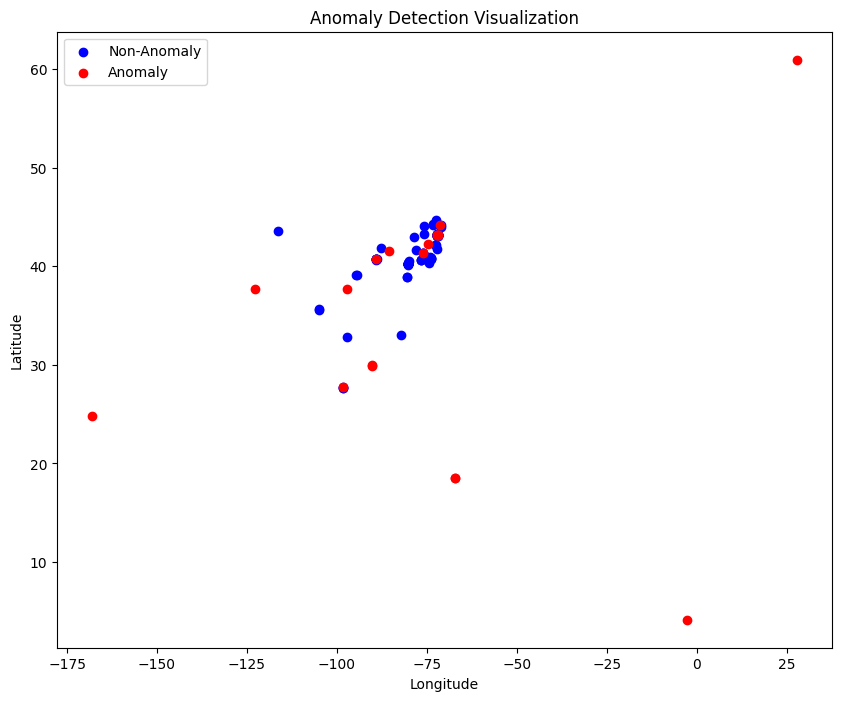

In [ ]:
# Plot anomalies in red and non-anomalies in blue
plt.figure(figsize=(10, 8))

# Plot non-anomalies (only a few for visualization)
non_anomaly_sample = df_4[df_4['svm_classification'] == 'Not Anomaly'].sample(100)
plt.scatter(non_anomaly_sample['Long'], non_anomaly_sample['Lat'], color='blue', label='Non-Anomaly')

# Plot anomalies
anomaly_records = df_4[df_4['svm_classification'] == 'Anomaly'].sample(20)
plt.scatter(anomaly_records['Long'], anomaly_records['Lat'], color='red', label='Anomaly')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Anomaly Detection Visualization')
plt.legend()
plt.show()

In [ ]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(
    df_4['svm_classification'].apply(lambda x: 1 if x == 'Anomaly' else 0),
    df_4['svm_prediction']
)

# Calculate AUC-PR
auc_pr = auc(recall, precision)

print("AUC-PR for One-Class SVM:", auc_pr)

AUC-PR for One-Class SVM: 0.05005095108695652


In [ ]:
import joblib

# Save the Isolation Forest model to a file
model_filename = "IsolationForest.joblib"
joblib.dump(isolation_forest, model_filename)
print("Model saved to", model_filename)


Model saved to IsolationForest.joblib


In [ ]:
# Save the StandardScaler to a file
scaler_filename = "StandardScaler.joblib"
joblib.dump(scaler, scaler_filename)
print("StandardScaler saved to", scaler_filename)

StandardScaler saved to StandardScaler.joblib
